In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from statsmodels.graphics.tsaplots import plot_pacf

from darkgreybox.model import DarkGreyModel, TiTh, TiTeTh, TiTeThRia
from darkgreybox.fit import wrapper

2020-10-20 15:50:42,816 darkgreybox  INFO     Logging enabled...


In [2]:
# the duration of a record
rec_duration = 1 # hour

In [3]:
train_df = pd.read_csv('./data/demo_data.csv', index_col=0, parse_dates=True)

input_X = train_df[['Ph', 'Ta', 'Th']]
input_y = train_df['Ti']

input_X['Ti0'] = input_y
input_X['Th0'] = input_y
input_X['Te0'] = input_y - 2 

print(f'Input X shape: {input_X.shape}, input y shape: {input_y.shape}')

Input X shape: (792, 6), input y shape: (792,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(input_X, input_y, test_size=5 / 33, shuffle=False)

print(f'Train: X shape: {X_train.shape}, y shape: {y_train.shape}')
print(f'Test: X shape: {X_test.shape}, y shape: {y_test.shape}')

Train: X shape: (672, 6), y shape: (672,)
Test: X shape: (120, 6), y shape: (120,)


In [5]:
train_params_TiTh = {
    'Ti0': {'value': X_train.iloc[0]['Ti0'], 'vary': False},
    'Th0': {'value': X_train.iloc[0]['Th0'], 'vary': False},    
    'Ci': {'value': 1},
    'Ch': {'value': 2.55, 'vary': False},
    'Ria': {'value': 1},
    'Rih': {'value': 0.65, 'vary': False}
}

train_params_TiTeTh = {
    'Ti0': {'value': X_train.iloc[0]['Ti0'], 'vary': False},
    'Te0': {'value': X_train.iloc[0]['Te0'], 'vary': True, 'min': 10, 'max': 25},
    'Th0': {'value': X_train.iloc[0]['Th0'], 'vary': False},    
    'Ci': {'value': 1},
    'Ch': {'value': 2.55, 'vary': False},
    'Ce': {'value': 1},
    'Rie': {'value': 1},
    'Rea': {'value': 1},
    'Rih': {'value': 0.65, 'vary': False}
}

train_params_TiTeThRia = {
    'Ti0': {'value': X_train.iloc[0]['Ti0'], 'vary': False},
    'Te0': {'value': X_train.iloc[0]['Te0'], 'vary': True, 'min': 10, 'max': 25},
    'Th0': {'value': X_train.iloc[0]['Th0'], 'vary': False},    
    'Ci': {'value': 1},
    'Ch': {'value': 2.55, 'vary': False},
    'Ce': {'value': 1},
    'Rie': {'value': 1},
    'Rea': {'value': 1},
    'Ria': {'value': 1},
    'Rih': {'value': 0.65, 'vary': False}
}

In [6]:
ic_params_map = {
    'Ti0': lambda X_test, y_test, train_result: y_test.iloc[0],
    'Th0': lambda X_test, y_test, train_result: y_test.iloc[0],
    'Te0': lambda X_test, y_test, train_result: train_result.Te[-1],
}

In [7]:
models = [TiTh(train_params_TiTh, rec_duration=1),
          TiTeTh(train_params_TiTeTh, rec_duration=1),
          TiTeThRia(train_params_TiTeThRia, rec_duration=1)]

In [8]:
prefit_splits = KFold(n_splits=int(len(X_train) / 24), shuffle=False).split(X_train)
error_metric = mean_squared_error
method = 'nelder'

df = wrapper(models, X_train, y_train, X_test, y_test, ic_params_map, error_metric,
             prefit_splits=prefit_splits, prefit_filter=None, reduce_train_results=True, 
             method=method, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:   49.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done  24 t

In [9]:
df

train                            \
                 start_date                  end_date   
0 2019-12-23 00:00:00+00:00 2020-01-19 23:00:00+00:00   
1 2019-12-23 00:00:00+00:00 2020-01-19 23:00:00+00:00   
2 2019-12-23 00:00:00+00:00 2020-01-19 23:00:00+00:00   
3 2019-12-23 00:00:00+00:00 2020-01-19 23:00:00+00:00   
4 2019-12-23 00:00:00+00:00 2020-01-19 23:00:00+00:00   
5 2019-12-23 00:00:00+00:00 2020-01-19 23:00:00+00:00   
6 2019-12-23 00:00:00+00:00 2020-01-19 23:00:00+00:00   
7 2019-12-23 00:00:00+00:00 2020-01-19 23:00:00+00:00   

                                                      \
                                               model   
0  <darkgreybox.model.TiTeThRia object at 0x7f98a...   
1  <darkgreybox.model.TiTeThRia object at 0x7f98a...   
2  <darkgreybox.model.TiTeTh object at 0x7f98a35e...   
3  <darkgreybox.model.TiTeTh object at 0x7f98a328...   
4  <darkgreybox.model.TiTeThRia object at 0x7f98a...   
5  <darkgreybox.model.TiTeThRia object at 0x7f98a...   
6  <darkgreybox.model.TiTh object at 0x7f989f3907d0>   
7  <darkgreybox.model.TiTh object at 0x7f98a35e3250>   

                                                                         \
                                        model_result       time  method   
0  <darkgreybox.model.DarkGreyModelResult object ...  37.116619  nelder   
1  <darkgreybox.model.DarkGreyModelResult object ...  53.245077  nelder   
2  <darkgreybox.model.DarkGreyModelResult object ...   7.537784  nelder   
3  <darkgreybox.model.DarkGreyModelResult object ...  17.112148  nelder   
4  <darkgreybox.model.DarkGreyModelResult object ...  16.896834  nelder   
5  <darkgreybox.model.DarkGreyModelResult object ...  25.856019  nelder   
6  <darkgreybox.model.DarkGreyModelResult object ...   0.924991  nelder   
7  <darkgreybox.model.DarkGreyModelResult object ...   2.243696  nelder   

                                 test                            \
      error                start_date                  end_date   
0  0.138289 2020-01-20 00:00:00+00:00 2020-01-24 23:00:00+00:00   
1  0.197209 2020-01-20 00:00:00+00:00 2020-01-24 23:00:00+00:00   
2  0.202914 2020-01-20 00:00:00+00:00 2020-01-24 23:00:00+00:00   
3  0.517008 2020-01-20 00:00:00+00:00 2020-01-24 23:00:00+00:00   
4  0.695041 2020-01-20 00:00:00+00:00 2020-01-24 23:00:00+00:00   
5  0.849894 2020-01-20 00:00:00+00:00 2020-01-24 23:00:00+00:00   
6  0.857195 2020-01-20 00:00:00+00:00 2020-01-24 23:00:00+00:00   
7  2.450488 2020-01-20 00:00:00+00:00 2020-01-24 23:00:00+00:00   

                                                      \
                                               model   
0  <darkgreybox.model.TiTeThRia object at 0x7f98a...   
1  <darkgreybox.model.TiTeThRia object at 0x7f98a...   
2  <darkgreybox.model.TiTeTh object at 0x7f98a367...   
3  <darkgreybox.model.TiTeTh object at 0x7f98a362...   
4  <darkgreybox.model.TiTeThRia object at 0x7f98a...   
5  <darkgreybox.model.TiTeThRia object at 0x7f98a...   
6  <darkgreybox.model.TiTh object at 0x7f98a36715d0>   
7  <darkgreybox.model.TiTh object at 0x7f98a3671650>   

                                                                          
                                        model_result      time     error  
0  <darkgreybox.model.DarkGreyModelResult object ...  0.003348  0.114438  
1  <darkgreybox.model.DarkGreyModelResult object ...  0.001677  0.205833  
2  <darkgreybox.model.DarkGreyModelResult object ...  0.001542  0.211367  
3  <darkgreybox.model.DarkGreyModelResult object ...  0.001639  0.329385  
4  <darkgreybox.model.DarkGreyModelResult object ...  0.003132  0.770027  
5  <darkgreybox.model.DarkGreyModelResult object ...  0.001882  1.151804  
6  <darkgreybox.model.DarkGreyModelResult object ...  0.002423  1.185899  
7  <darkgreybox.model.DarkGreyModelResult object ...  0.001152  4.486070

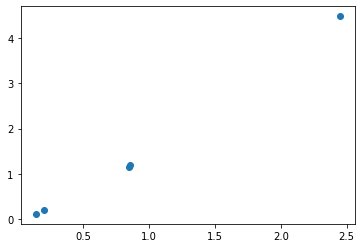

In [20]:
import matplotlib.pyplot as plt

plt.scatter(output_df.dropna()[('train', 'error')], output_df.dropna()[('test', 'error')])


Parameters([('Ti0', <Parameter 'Ti0', value=17.9125 (fixed), bounds=[-inf:inf]>), ('Te0', <Parameter 'Te0', value=20.026596894784625, bounds=[10:25]>), ('Th0', <Parameter 'Th0', value=17.9125 (fixed), bounds=[-inf:inf]>), ('Ci', <Parameter 'Ci', value=156.98871939553823, bounds=[-inf:inf]>), ('Ch', <Parameter 'Ch', value=2.55 (fixed), bounds=[-inf:inf]>), ('Ce', <Parameter 'Ce', value=389.1556931805535, bounds=[-inf:inf]>), ('Rie', <Parameter 'Rie', value=0.11065589694726137, bounds=[-inf:inf]>), ('Rea', <Parameter 'Rea', value=405778124793.14307, bounds=[-inf:inf]>), ('Ria', <Parameter 'Ria', value=0.6371867039704662, bounds=[-inf:inf]>), ('Rih', <Parameter 'Rih', value=0.65 (fixed), bounds=[-inf:inf]>)])
Parameters([('Ti0', <Parameter 'Ti0', value=17.9125 (fixed), bounds=[-inf:inf]>), ('Te0', <Parameter 'Te0', value=18.100815253148514 +/- 0.0905, bounds=[10:25]>), ('Th0', <Parameter 'Th0', value=17.9125 (fixed), bounds=[-inf:inf]>), ('Ci', <Parameter 'Ci', value=139.47499887562222 +/

/Users/quarentine/.virtualenvs/darkgreybox/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Parameters([('Ti0', <Parameter 'Ti0', value=17.9125 (fixed), bounds=[-inf:inf]>), ('Th0', <Parameter 'Th0', value=17.9125 (fixed), bounds=[-inf:inf]>), ('Ci', <Parameter 'Ci', value=459.8572918945356 +/- 13.2, bounds=[-inf:inf]>), ('Ch', <Parameter 'Ch', value=2.55 (fixed), bounds=[-inf:inf]>), ('Ria', <Parameter 'Ria', value=0.6403631287463651 +/- 0.00384, bounds=[-inf:inf]>), ('Rih', <Parameter 'Rih', value=0.65 (fixed), bounds=[-inf:inf]>)])


AttributeError: 'DarkGreyModelResult' object has no attribute 'Te'

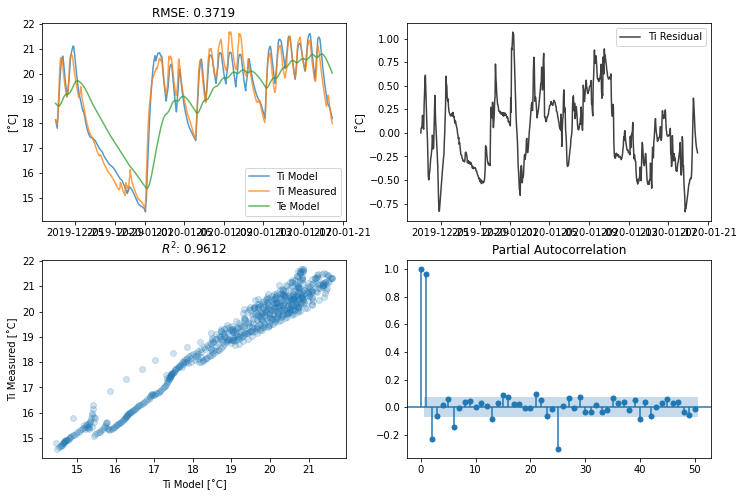

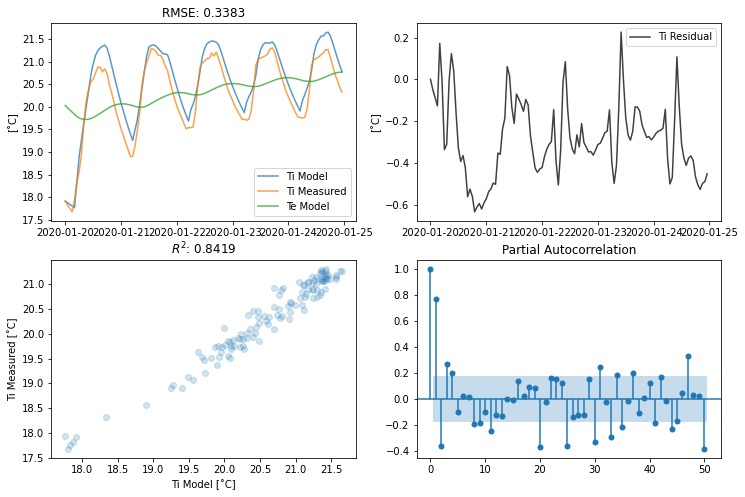

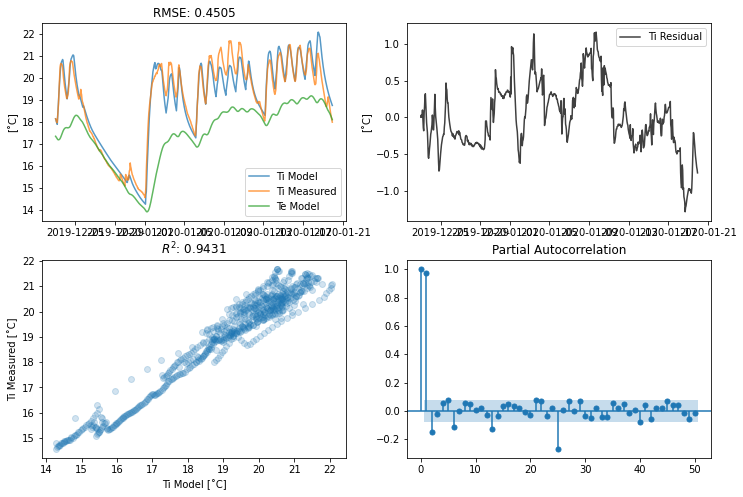

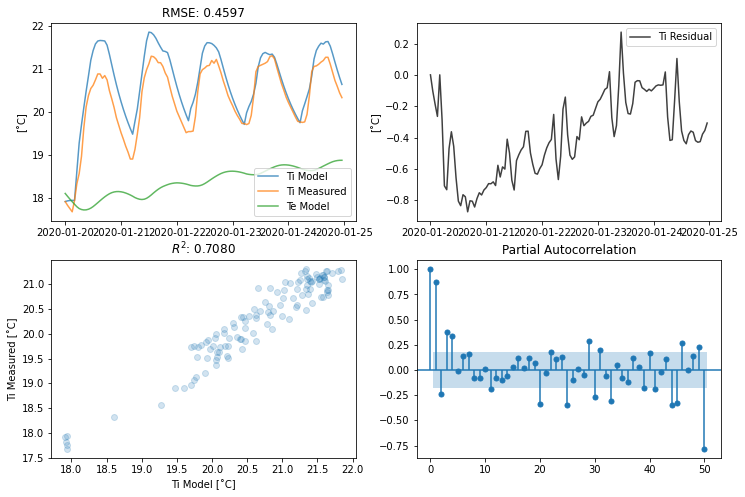

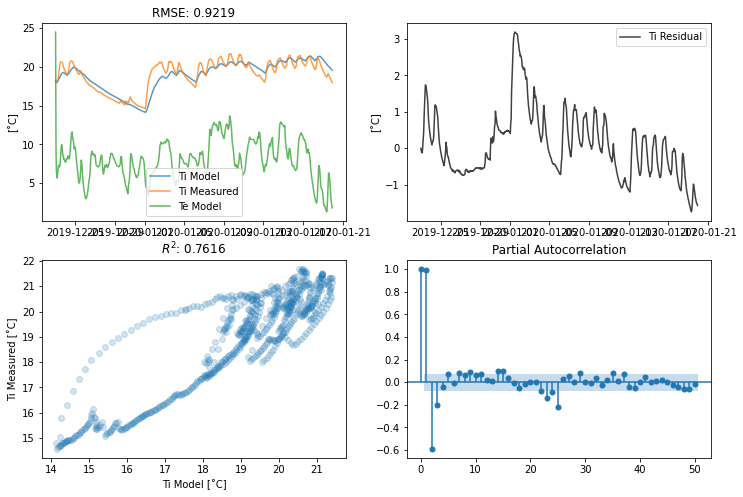

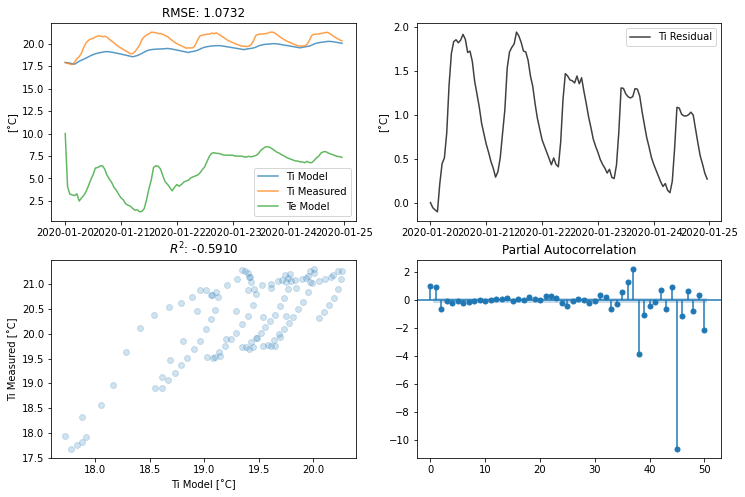

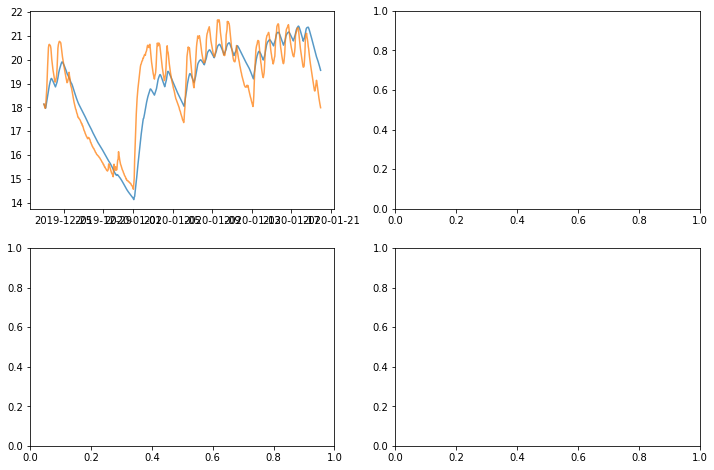

In [164]:
for idx, row in output_df.iterrows():
    print(row[('train', 'model')].result.params)
    plot(X_train, y_train, row[('train', 'model_result')])
    plot(X_test, y_test, row[('test', 'model_result')])

In [160]:
def plot(X, y, model_result):

    rmse = mean_squared_error(y, model_result.Z) ** 0.5
    r2 = r2_score(y, model_result.Z)

    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    ax[0, 0].plot(y.index, model_result.Z, label='Ti Model', alpha=0.75)
    ax[0, 0].plot(y, label='Ti Measured', alpha=0.75)
    ax[0, 0].plot(y.index, model_result.Te, label='Te Model', alpha=0.75)
    ax[0, 0].legend()
    ax[0, 0].set_ylabel('[˚C]')
    ax[0, 0].set_title(f'RMSE: {rmse:.4f}')

    ax[1, 0].scatter(model_result.Z, y, alpha=0.2)
    ax[1, 0].set_xlabel('Ti Model [˚C]')
    ax[1, 0].set_ylabel('Ti Measured [˚C]')
    ax[1, 0].set_title(f'$R^2$: {r2:.4f}')

    ax[0, 1].plot(y.index, y - model_result.Z, label='Ti Residual', color='black', alpha=0.75)
    ax[0, 1].legend()
    ax[0, 1].set_ylabel('[˚C]')

    plot_pacf(y - model_result.Z, ax=ax[1, 1], lags=50);


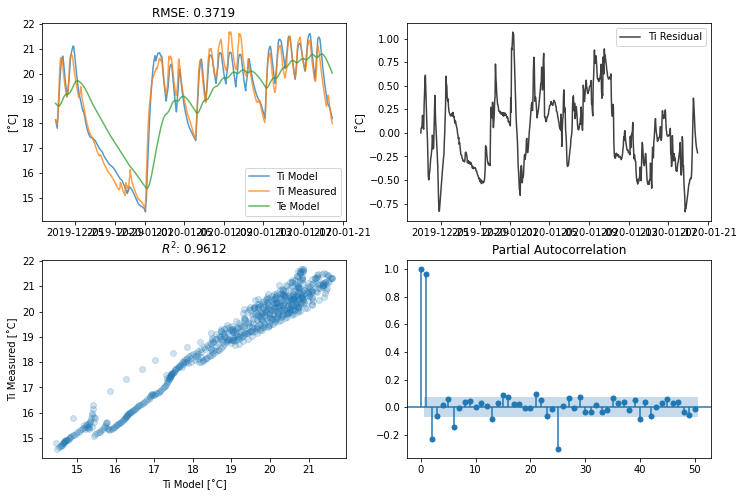

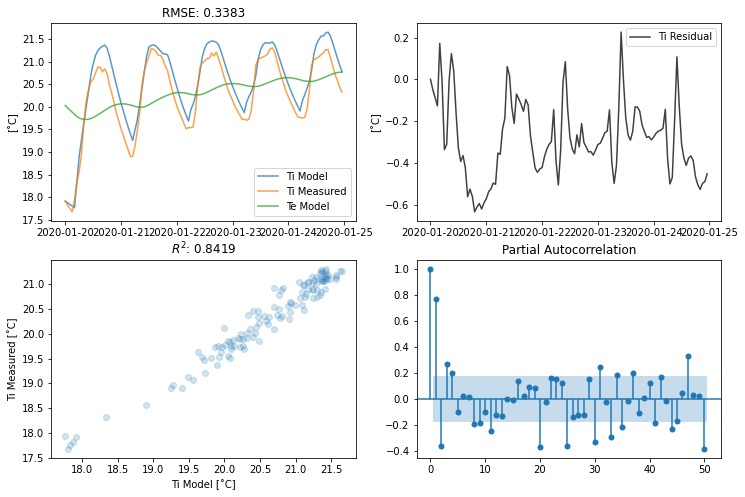

In [163]:
plot(X_train, y_train, train_result)
plot(X_test, y_test, test_result)